In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit.Chem import MCS
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit import rdBase

from rdkit.Chem import rdMolDescriptors

import numpy as np
import pandas as pd

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# 여기부터 시작

In [2]:

def label(a): 
    return 100*int(a.GetHybridization())+a.GetAtomicNum()

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data= pd.read_csv('MCS_smiles.txt')

In [4]:
smiles_list=data['smiles']

In [5]:
for i in range (len(smiles_list)):
    if i==0:
        smis=[smiles_list[0],
          smiles_list[1]]
        ms = [Chem.MolFromSmiles(x) for x in smis]
        nms = [Chem.Mol(x) for x in ms]
        for nm in nms:
            for at in nm.GetAtoms():
                at.SetIsotope(label(at))
        mcs=MCS.FindMCS(nms,atomCompare='isotopes')
        mcs.smarts
        mcsp = Chem.MolFromSmarts(mcs.smarts)
        match = nms[0].GetSubstructMatch(mcsp)
        tmp=Chem.MolFragmentToSmiles(ms[0],atomsToUse=match,isomericSmiles=True,canonical=False)
        #smi
        #core = Chem.MolFromSmiles(smi)
        #core
    elif 0<i and i< (len(smiles_list)-1):
        smis=[smiles_list[i+1],tmp]
        ms = [Chem.MolFromSmiles(x) for x in smis]
        nms = [Chem.Mol(x) for x in ms]
        for nm in nms:
            for at in nm.GetAtoms():
                at.SetIsotope(label(at))
        mcs=MCS.FindMCS(nms,atomCompare='isotopes')
        mcs.smarts
        mcsp = Chem.MolFromSmarts(mcs.smarts)
        match = nms[0].GetSubstructMatch(mcsp)
        tmp=Chem.MolFragmentToSmiles(ms[0],atomsToUse=match,isomericSmiles=True,canonical=False)
        #smi
        core = Chem.MolFromSmiles(tmp)
        #core
    elif i==(len(smiles_list)-1):
        sms=tmp
        print("len(smiles_list):" ,len(smiles_list), "\n-finished-")
        print(sms)
        

len(smiles_list): 8 
-finished-
Cc1[nH]c(/C=C2\C(=O)Nc3ccccc32)c(C)c1C(=O)NCC


C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.


In [6]:
sms

'Cc1[nH]c(/C=C2\\C(=O)Nc3ccccc32)c(C)c1C(=O)NCC'

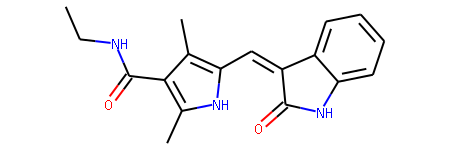

In [7]:
core

In [8]:
smiles_list

0    CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C/2\C(=O)Nc3ccc(...
1    CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C/2\C(=O)Nc3ccc(...
2    CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C/2\C(=O)Nc3ccc(...
3    CCN(CC)CCN1CCc2[nH]c(/C=C/3\C(=O)Nc4ccc(F)cc34...
4    Cc1c(/C=C/2\C(=O)Nc3ccc(F)cc23)[nH]c2c1C(=O)N(...
5    CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C/2\C(=O)Nc3ccc(...
6    CCN(CC)CCNC(=O)c1c(C)[nH]c2c1CCC/C/2=C\1/C(=O)...
7    Cc1[nH]c(/C=C/2\C(=O)Nc3ccc(F)cc23)c(C)c1C(=O)...
Name: smiles, dtype: object

In [9]:
len(smiles_list)

8